##### NSL-KDD Binary Classification using Ensemble Model

In [1]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [3]:
import pickle

pickle_in = open("X_train_NSL_B.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_NSL_B.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test_NSL_B.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test_NSL_B.pickle","rb")
y_test = pickle.load(pickle_in)

In [8]:
#Ensemble model Architecture
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
  
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))  #Logistic Regression
level0.append(('knn', KNeighborsClassifier())) #KNN
level0.append(('cart', DecisionTreeClassifier())) # Decision Tree
level0.append(('rfc', RandomForestClassifier())) #Random Forest Classifier
# level0.append(('xgb', XGBClassifier(silent=0,
#                      scale_pos_weight=1,
#                      learning_rate=0.01,
#                      colsample_bytree=0.6,
#                      subsample=0.8,
#                      objective='binary:logistic',
#                      n_estimators=100,
#                      reg_alpha=0.3,
#                      max_depth=3,
#                      gamma=1)))  #XGBoost
level1 = LogisticRegression()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5) #Stacking Classifier
model.fit(X_train, y_train.ravel())

e:\code\ml\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\code\ml\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('rfc', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [9]:
#predicting the test data with the trained model
ensemble_prediction = model.predict(X_test)

In [10]:
#Performance Evaluation
print("Train score is:", model.score(X_train, y_train))
print("Test score is:",model.score(X_test,y_test))

Train score is: 0.999944432537131
Test score is: 0.7814052519517388


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(ensemble_prediction, y_test))
print('Classification Report')
print(classification_report(ensemble_prediction, y_test))

Confusion Matrix
[[9453 4670]
 [ 258 8163]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     14123
           1       0.64      0.97      0.77      8421

    accuracy                           0.78     22544
   macro avg       0.80      0.82      0.78     22544
weighted avg       0.85      0.78      0.78     22544



In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

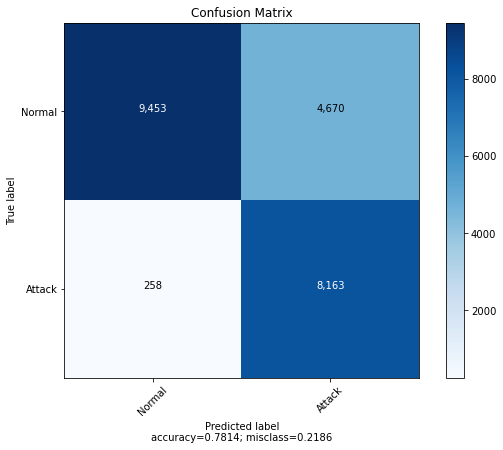

In [13]:
plot_confusion_matrix(confusion_matrix(ensemble_prediction, y_test), 
                      normalize    = False,
                      target_names = ["Normal","Attack"],
                      title        = "Confusion Matrix")

Basic Model: ROC AUC=0.500
Ensemble Model: ROC AUC=0.953


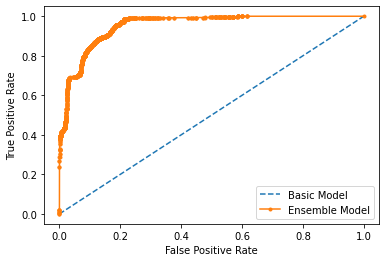

In [14]:
#Area under ROC curve - performance metrics
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
bm_probs = [0 for _ in range(len(y_test))]
# predict probabilities
em_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
em_probs = em_probs[:, 1]
# calculate scores
bm_auc = roc_auc_score(y_test, bm_probs)
em_auc = roc_auc_score(y_test, em_probs)
# summarize scores
print('Basic Model: ROC AUC=%.3f' % (bm_auc))
print('Ensemble Model: ROC AUC=%.3f' % (em_auc))
# calculate roc curves
bm_fpr, bm_tpr, _ = roc_curve(y_test, bm_probs)
em_fpr, em_tpr, _ = roc_curve(y_test, em_probs)
# plot the roc curve for the model
pyplot.plot(bm_fpr, bm_tpr, linestyle='--', label='Basic Model')
pyplot.plot(em_fpr, em_tpr, marker='.', label='Ensemble Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()